# GVradar #

### Global Precipitation Measurement (GPM) Ground Validation (GV) radar processing software (GVradar).

* Python based Dual Pol Quality Control (DPQC), utilizing the Python Atmospheric Radiation Measurement (ARM) Radar Toolkit (Py-ART) and CSU Radar Tools.
* Precipitation product generation from Dual Pol, utilizing the Python Atmospheric Radiation Measurement (ARM) Radar Toolkit (Py-ART) and CSU Radar Tools.
* Developed by the NASA GPM-GV group
* V0.3 - 03/16/2021 - update by Jason Pippitt NASA/GSFC/SSAI

### Notebook is for learning purposes.  Operationally, GVradar will be run from the command line, see README.

### Install GVradar as shown in the README, now you can import GVradar and declare your input file.

In [1]:
from gvradar import GVradar

file = './raw/np1210212094203.RAW0V7Y.gz'


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

Done.



### First, we will run QC.  There are multiple options that allow the user to set threshold, image, output, and sounding prefrences.

In [2]:
kwargs = {}

# Set DBZ threshold, values less than thresh will be masked.
kwargs.update({'do_dbz': True, 'dbz_thresh': 5.0})

# Set RHOhv threshold, values less than thresh will be masked.
kwargs.update({'do_rh': True, 'rh_thresh': 0.72})

# Set ZDR threshold, values outside of range will be masked.
kwargs.update({'do_zdr': True, 'dr_min': -6.0, 'dr_max': 4.0})

# Set KDP threshold, values outside of range will be masked.
kwargs.update({'do_kdp': False, 'kdp_min': -2.0, 'kdp_max': 7.0})

# Set SQ threshold, values less than thresh will be masked.
kwargs.update({'do_sq': False, 'sq_thresh': 0.45})

# Set SD threshold, values greater than thresh will be masked.
kwargs.update({'do_sd': True, 'sd_thresh': 25.0})

# Set PH threshold, values less than thresh will be masked.
kwargs.update({'do_ph': False, 'ph_thresh': 80.0})

# Apply an AP filter, when DBZ is less then ap_dbz and ZDR is greater than ap_zdr, data will be masked.
kwargs.update({'do_ap': False, 'ap_dbz': 45, 'ap_zdr': 3})

# Apply CSU insect or despeckle filters.
kwargs.update({'do_insect': False, 'do_despeckle': True})

# Apply sector filters, Dual Pol thresholds can be applied to an user defined sector if needed.
# Cone of silence filter, data within area will be masked.
kwargs.update({'do_cos': False, 'coshmin': 0, 'coshmax': None, 'cosrmin': 0, 'cosrmax': 5,
               'cosazmin': 0, 'cosazmax': 360, 'coselmin': 0, 'coselmax': 20.0})

# Sector filter to masked all data, no thresholds needed.
kwargs.update({'do_sector': False, 'sechmin': 0, 'sechmax': None, 'secrmin': 0, 'secrmax': 150,
               'secazmin': 160, 'secazmax': 165, 'secelmin': 0, 'secelmax': 20.0})

# Sector filter with RHOhv threshold, data in sector with values less than rh_sec will be masked.
kwargs.update({'do_rh_sector': False, 'rhhmin': 0, 'rhhmax': None, 'rhrmin': 0, 'rhrmax': 20, 
               'rhazmin': 0, 'rhazmax': 360, 'rhelmin': 0, 'rhelmax': 7.0, 'rh_sec': 0.92})

# Sector filter with SD threshold, data in sector with values less than sd_sec will be masked.
kwargs.update({'do_sd_sector': False, 'sdhmin': 0, 'sdhmax': None, 'sdrmin': 0, 'sdrmax': 20, 
               'sdazmin': 0, 'sdazmax': 360, 'sdelmin': 0, 'sdelmax': 7.0, 'sd_sec': 8.0})

# Sector filter with PH threshold, data in sector with values less than ph_sec will be masked.
kwargs.update({'do_ph_sector': False, 'phhmin': 0, 'phhmax': None, 'phrmin': 0, 'phrmax': 150, 
               'phazmin': 160, 'phazmax': 165, 'phelmin': 0, 'phelmax': 20.0, 'ph_sec': 80.0})

# Apply calibration corrections if needed, both are subtracted.
kwargs.update({'apply_cal': True, 'ref_cal': 0.2, 'zdr_cal': 0.0})

## There are two options for applying QC thresholds.

# Apply QC thresholds based on height of the radar beam (km).
# If True QC will be applied below qc_height.
kwargs.update({'use_qc_height': True, 'qc_height': 4.4})

# Apply QC based on the height of the freezing level.
# If True, QC will only be applied below freeing level.
kwargs.update({'use_sounding': False, 'sounding_type': 'ruc_archive',
               'sounding_dir': './sounding/'})

# Directory to write output file
kwargs.update({'cf_dir': './cf'})

# Select plot limits, plot type (single or multiplot), and fields to plot.
kwargs.update({'plot_images': True, 'max_range': 150, 'max_height': 15, 
               'sweeps_to_plot': [0], 'plot_single': False, 'add_logos': True, 
               'fields_to_plot': ['DZ', 'CZ', 'VR', 'DR', 'KD', 'PH', 'RH', 'SD'],
               'plot_dir': './plots/'})

### Now we can run QC.


QC parameters:    

{'site': 'NPOL', 'scan_type': 'PPI', 'month': '02', 'day': '12', 'year': '2021', 'hh': '09', 'mm': '42', 'ss': '11', 'ref_field_name': 'CZ', 'phi_field_name': 'PH', 'zdr_field_name': 'DR', 'do_dbz': True, 'dbz_thresh': 5.0, 'do_rh': True, 'rh_thresh': 0.72, 'do_zdr': True, 'dr_min': -6.0, 'dr_max': 4.0, 'do_kdp': False, 'kdp_min': -2.0, 'kdp_max': 7.0, 'do_sq': False, 'sq_thresh': 0.45, 'do_sd': True, 'sd_thresh': 25.0, 'do_ph': False, 'ph_thresh': 80.0, 'do_ap': False, 'ap_dbz': 45, 'ap_zdr': 3, 'do_insect': False, 'do_despeckle': True, 'do_cos': False, 'coshmin': 0, 'coshmax': None, 'cosrmin': 0, 'cosrmax': 5, 'cosazmin': 0, 'cosazmax': 360, 'coselmin': 0, 'coselmax': 20.0, 'do_sector': False, 'sechmin': 0, 'sechmax': None, 'secrmin': 0, 'secrmax': 150, 'secazmin': 160, 'secazmax': 165, 'secelmin': 0, 'secelmax': 20.0, 'do_rh_sector': False, 'rhhmin': 0, 'rhhmax': None, 'rhrmin': 0, 'rhrmax': 20, 'rhazmin': 0, 'rhazmax': 360, 'rhelmin': 0, 'rhelmax': 7.0, 'rh_sec

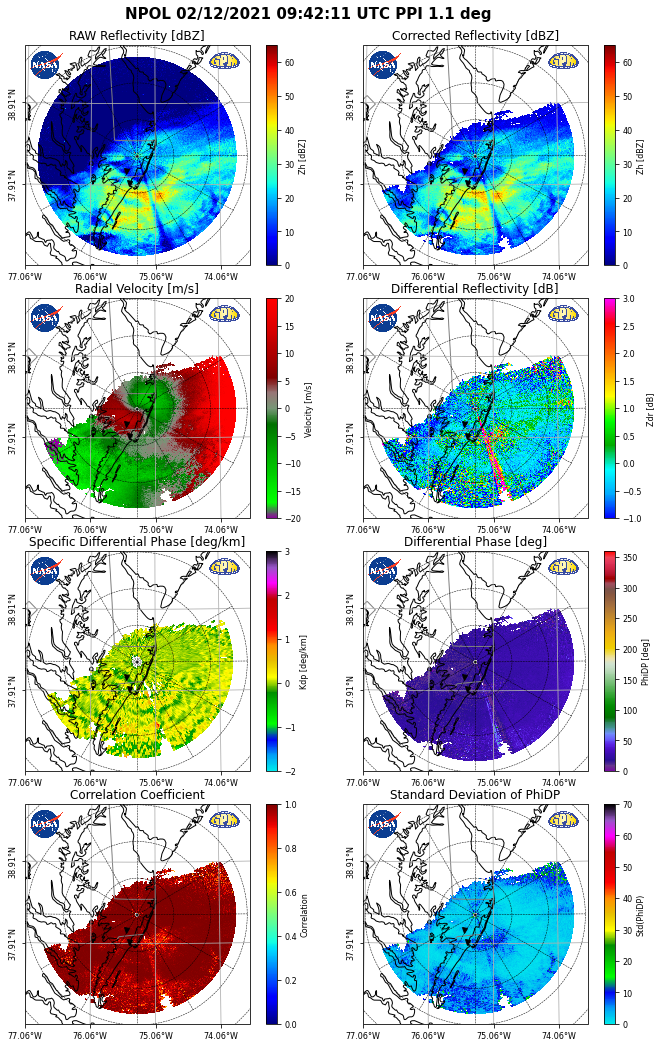

In [3]:
q = GVradar.QC(file, **kwargs)
q.run_dpqc()

### QC is complete, now we can create Dual Pol products.

In [4]:
# Place the QC output into radar structure

cf_file = './cf/NPOL_2021_0212_094211_PPI.cf.gz'

### Set DP product options

In [5]:
kwargs_product = {}

# Select if you want to output a cf file and what fields to write
kwargs_product.update({'output_cf': True, 'cf_dir': './cf/', 
               'output_fields': ['DZ', 'CZ', 'VR', 'DR', 'KD', 'PH', 'RH', 'SD', 'SQ', 'FH', 'RC', 'DM', 'NW']})

# Select plots ranges, type, and fields
kwargs_product.update({'plot_images': True, 'plot_single': False,
                       'max_range': 150, 'max_height': 10, 'sweeps_to_plot': [0],
                       'fields_to_plot': ['CZ','RC','FH', 'DM', 'NW'],
                       'plot_dir': './plots/', 'add_logos': True})

# A Sounding is needed for DP products, sounding type can be; uwy, ruc, ruc_archive)
kwargs_product.update({'use_sounding': True, 'sounding_type': 'ruc_archive',
                       'sounding_dir': './sounding/'})

### Now we can run DP products


DP products parameters:    

{'site': 'NPOL', 'scan_type': 'PPI', 'month': '02', 'day': '12', 'year': '2021', 'hh': '09', 'mm': '42', 'ss': '11', 'ref_field_name': 'CZ', 'phi_field_name': 'PH', 'zdr_field_name': 'DR', 'output_cf': True, 'cf_dir': './cf/', 'output_fields': ['DZ', 'CZ', 'VR', 'DR', 'KD', 'PH', 'RH', 'SD', 'SQ', 'FH', 'RC', 'DM', 'NW'], 'plot_images': True, 'plot_single': False, 'max_range': 150, 'max_height': 10, 'sweeps_to_plot': [0], 'fields_to_plot': ['CZ', 'RC', 'FH', 'DM', 'NW'], 'plot_dir': './plots/', 'add_logos': True, 'use_sounding': True, 'sounding_type': 'ruc_archive', 'sounding_dir': './sounding/'}

Processing --> ./cf/NPOL_2021_0212_094211_PPI.cf.gz

Renaming radar fields...
dict_keys(['DZ', 'VR', 'SW', 'DR', 'KD', 'PH', 'RH', 'SQ', 'CZ', 'SD'])

Interpolating sounding to radar structure...
Sounding file -->  ./sounding/2021/0212/NPOL/NPOL_2021_0212_10UTC.txt

Calculating DP products:  
    Add HID field to radar...
    Calculating water and ice mass...
   

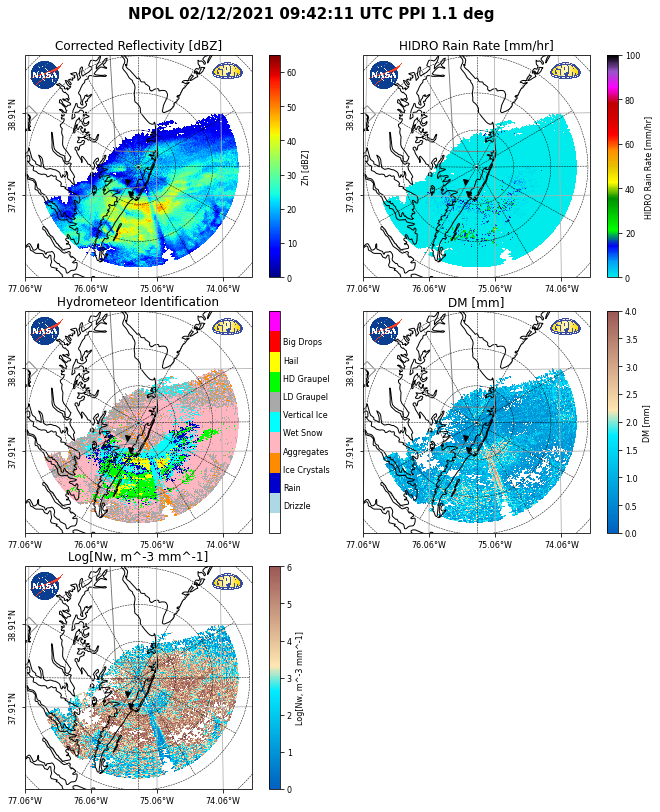

In [6]:
d = GVradar.DP_products(cf_file, **kwargs_product)
d.run_DP_products()